In [1]:
'''
Part1:Keras教程
1、学会使用keras(由python写成并能运行于tensorflow和CNTK等底层框架)
2、短时间内建立一个深度学习算法

keras的特点：
1、tensorflow是比python高层的框架，keras更高层且提供了额外的抽象，能够最快地实现将idea进行实现，从而找出更好的模型
2、当然，keras比底层框架受限制更多，因此有些复杂的模型无法轻松在keras上实现但能在tensorflow上实现

'''

'\nPart1:Keras教程\n1、学会使用keras(由python写成并能运行于tensorflow和CNTK等底层框架)\n2、短时间内建立一个深度学习算法\n\nkeras的特点：\n1、tensorflow是比python高层的框架，keras更高层且提供了额外的抽象，能够最快地实现将idea进行实现，从而找出更好的模型\n2、当然，keras比底层框架受限制更多，因此有些复杂的模型无法轻松在keras上实现但能在tensorflow上实现\n\n'

In [2]:
import numpy as np
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline


c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
'''
问题背景：Happy House
Happy House的门口放置一个摄像头，拍摄来访者的头像，现要求构建一个模型，能够识别来访者是否happy，确定happy时房门才打开。
现已收集到多人的带标签（是否happy）数据，利用数据进行训练。

'''

'\n问题背景：Happy House\nHappy House的门口放置一个摄像头，拍摄来访者的头像，现要求构建一个模型，能够识别来访者是否happy，确定happy时房门才打开。\n现已收集到多人的带标签（是否happy）数据，利用数据进行训练。\n\n'

In [4]:
#导入数据并normalize

#X_train_orig:(600,64,64,3)   X_test_orig:(150,64,64,3) 
#Y_train_orig:(1,600)   Y_test_orig:(1,150)
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes=load_dataset()

#normalize
X_train=X_train_orig/255
X_test=X_test_orig/255

#reshape
Y_train=Y_train_orig.T
Y_test=Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [5]:
'''
用keras建立模型：迅速建立模型原型
'''

'\n用keras建立模型：迅速建立模型原型\n'

In [6]:
def model(input_shape):
    #定义输入占位符——维度为input_shape的tensor，即输入模型的图像
    X_input=Input(input_shape)
    
    #Zero-Padding:用0填充
    X=ZeroPadding2D((3,3))(X_input)
    
    #conv->BN->RELU  施加于X
    X=Conv2D(32,(7,7),strides=(1,1),name='conv0')(X)
    X=BatchNormalization(axis=3,name='bn0')(X)
    X=Activation('relu')(X)
    
    #MAXPOOL
    X=MaxPooling2D((2,2),name='max_pool')(X)
    
    #flatten为vector
    X=Flatten()(X)
    X=Dense(1,activation='sigmoid',name='fc')(X)
    
    #创建模型
    model=Model(inputs=X_input,outputs=X,name='HappyModel')
    
    return model

'''
1、keras使用与tensorflow、numpy不同的变量：
比如keras不是每一步都规定一个新的变量X/Z1/A1/Z2/A2，而是每层都用X=...的形式赋值，唯一的例外是X_input，因为最终的Model()需要参数
2、上述模型架构都是自由可定制的。比如使用平均池化，全局最大池化，失活等方法
'''

'\n1、keras使用与tensorflow、numpy不同的变量：\n比如keras不是每一步都规定一个新的变量X/Z1/A1/Z2/A2，而是每层都用X=...的形式赋值，唯一的例外是X_input，因为最终的Model()需要参数\n2、上述模型架构都是自由可定制的。比如使用平均池化，全局最大池化，失活等方法\n'

In [7]:
#自定义的HappyModel,升级版
#该函数用于描述定义的模型
def HappyModel(input_shape):
    
    X_input=Input(input_shape)
    
    X=ZeroPadding2D((3,3))(X_input)
    
    X=Conv2D(32,(7,7),strides=(1,1),name='conv0')(X)
    X=BatchNormalization(axis=3,name='bn0')(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((2,2),name='max_pool')(X)
    
    X=Flatten()(X)
    X=Dense(1,activation='sigmoid',name='fc')(X)
    
    model=Model(inputs=X_input,outputs=X,name='HappyModel')
    
    return model
    

In [8]:
'''
训练和测试模型共分为四步：
1、调用函数创建模型
2、调用函数编译模型：model.compile(optimizer="...",loss="...",metrics=["accuracy"])
3、用训练集训练模型:model.fit(x=...,y=...,epoch=...,batch_size=...)
4、用测试集测试模型:model.evaluate(x=...,y=...)

相关函数参数链接：https://keras.io/models/model/
'''

'\n训练和测试模型共分为四步：\n1、调用函数创建模型\n2、调用函数编译模型：model.compile(optimizer="...",loss="...",metrics=["accuracy"])\n3、用训练集训练模型:model.fit(x=...,y=...,epoch=...,batch_size=...)\n4、用测试集测试模型:model.evaluate(x=...,y=...)\n\n相关函数参数链接：https://keras.io/models/model/\n'

In [9]:
#step1:
happyModel=HappyModel(X_train.shape[1:])

#step2:
#Adam算法综合动量梯度下降(一阶矩)和RMSprop(二阶矩)方法，包括β1、β2、e三个参数
happyModel.compile(optimizer='Adam',loss="binary_crossentropy",metrics=["accuracy"])

#step3:训练模型
happyModel.fit(x=X_train,y=Y_train,epochs=10,batch_size=32)

Epoch 1/10
600/600 [==============================] - 9s 16ms/step - loss: 3.1302 - acc: 0.5417
Epoch 2/10
600/600 [==============================] - 10s 16ms/step - loss: 0.6971 - acc: 0.7583
Epoch 3/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2387 - acc: 0.8983
Epoch 4/10
600/600 [==============================] - 10s 16ms/step - loss: 0.1589 - acc: 0.9417
Epoch 5/10
600/600 [==============================] - 11s 19ms/step - loss: 0.1411 - acc: 0.9417
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1308 - acc: 0.9500
Epoch 7/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0992 - acc: 0.9700
Epoch 8/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0984 - acc: 0.9633
Epoch 9/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0798 - acc: 0.9767
Epoch 10/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1191 - acc: 0.9483


In [10]:
#step1:
happyModel=HappyModel(X_train.shape[1:])

#step2:
#Adam算法综合动量梯度下降(一阶矩)和RMSprop(二阶矩)方法，包括β1、β2、e三个参数
happyModel.compile(optimizer='RMSprop',loss="binary_crossentropy",metrics=["accuracy"])

#step3:训练模型
happyModel.fit(x=X_train,y=Y_train,epochs=10,batch_size=32)

'''
对比以上两种不同的优化方式Adam和RMSprop发现,前者效果好，后者没能收敛，
效果差，体现了集成动量梯度下降方法后的优势

'''


Epoch 1/10
600/600 [==============================] - 10s 17ms/step - loss: 7.5527 - acc: 0.5100
Epoch 2/10
600/600 [==============================] - 10s 16ms/step - loss: 7.9712 - acc: 0.5000
Epoch 3/10
600/600 [==============================] - 10s 17ms/step - loss: 7.9712 - acc: 0.5000
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 7.9712 - acc: 0.5000
Epoch 5/10
600/600 [==============================] - 10s 16ms/step - loss: 7.9712 - acc: 0.5000
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 7.9712 - acc: 0.5000
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 7.9712 - acc: 0.5000
Epoch 8/10
600/600 [==============================] - 10s 17ms/step - loss: 7.9712 - acc: 0.5000
Epoch 9/10
600/600 [==============================] - 10s 17ms/step - loss: 7.9712 - acc: 0.5000
Epoch 10/10
600/600 [==============================] - 10s 17ms/step - loss: 7.9712 - acc: 0.5000


'\n对比以上两种不同的优化方式Adam和RMSprop发现,前者效果好，后者没能收敛，\n效果差，体现了集成动量梯度下降方法后的优势\n\n'

In [11]:
preds=happyModel.evaluate(X_test,Y_test)
print()
print("Loss="+str(preds[0]))
print("Test Accuracy="+str(preds[1]))
'''
此处要注意：因为在Adam优化之后我又尝试了RMSprop优化，所以训练处的参数是效果较差的参数，
要想在测试集上有好的效果，必须重新用Adam方法进行拟合

'''

150/150 [==============================] - 1s 8ms/step

Loss=7.014649340311686
Test Accuracy=0.5599999984105428


'\n此处要注意：因为在Adam优化之后我又尝试了RMSprop优化，所以训练处的参数是效果较差的参数，\n要想在测试集上有好的效果，必须重新用Adam方法进行拟合\n\n'

In [12]:
#step1:
happyModel=HappyModel(X_train.shape[1:])

#step2:
#Adam算法综合动量梯度下降(一阶矩)和RMSprop(二阶矩)方法，包括β1、β2、e三个参数
happyModel.compile(optimizer='Adam',loss="binary_crossentropy",metrics=["accuracy"])

#step3:训练模型
happyModel.fit(x=X_train,y=Y_train,epochs=10,batch_size=32)

'''
可以看出，在epoch2-5时训练精度就已经收敛。所以如果要比较不同模型的优劣的话，只需要比较前面几次epoch即可

'''


Epoch 1/10
600/600 [==============================] - 10s 17ms/step - loss: 1.0814 - acc: 0.6567
Epoch 2/10
600/600 [==============================] - 10s 17ms/step - loss: 0.3007 - acc: 0.8717
Epoch 3/10
600/600 [==============================] - 10s 16ms/step - loss: 0.1366 - acc: 0.9450
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1193 - acc: 0.9600
Epoch 5/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1728 - acc: 0.9300
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1152 - acc: 0.9717
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0706 - acc: 0.9750
Epoch 8/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0843 - acc: 0.9733
Epoch 9/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0712 - acc: 0.9733
Epoch 10/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0455 - acc: 0.9917


'\n可以看出，在epoch2-5时训练精度就已经收敛。所以如果要比较不同模型的优劣的话，只需要比较前面几次epoch即可\n\n'

In [13]:
preds=happyModel.evaluate(X_test,Y_test)
print()
print("Loss="+str(preds[0]))
print("Test Accuracy="+str(preds[1]))

'''
再次运行，效果杠杠滴！！
'''

150/150 [==============================] - 1s 8ms/step

Loss=0.1909296174844106
Test Accuracy=0.9200000015894572


'\n再次运行，效果杠杠滴！！\n'

In [14]:
'''
如果发现精度不够，可以使用以下代码：
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)

方法：
1、训练直至shape[0](height)和shape[1](width)都比较小且channel比较大，这样就将有效信息集中在一个小小的空间里
2、将小空间flatten为vector，并传入全连接层

提升精度的几种方式：
1、最大值池化方式降低height和width
2、采用Adam优化器——最佳
3、如果遇到计算性能瓶颈，降低batch_size减轻计算压力
4、运行更多次迭代，直到精度收敛

如果在此模型上进行超参数调试的话，测试集就变成了开发集，这样会造成过拟合。


'''

"\n如果发现精度不够，可以使用以下代码：\nX = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)\nX = BatchNormalization(axis = 3, name = 'bn0')(X)\nX = Activation('relu')(X)\n\n方法：\n1、训练直至shape[0](height)和shape[1](width)都比较小且channel比较大，这样就将有效信息集中在一个小小的空间里\n2、将小空间flatten为vector，并传入全连接层\n\n提升精度的几种方式：\n1、最大值池化方式降低height和width\n2、采用Adam优化器——最佳\n3、如果遇到计算性能瓶颈，降低batch_size减轻计算压力\n4、运行更多次迭代，直到精度收敛\n\n如果在此模型上进行超参数调试的话，测试集就变成了开发集，这样会造成过拟合。\n\n\n"

[[1.]]


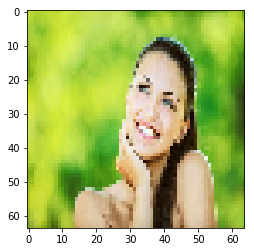

In [15]:
'''
用图片测试模型：

'''

img_path="images/my_image.jpg"
img=image.load_img(img_path,target_size=(64,64))
imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

print(happyModel.predict(x))

#预测成功 happy

[[1.]]


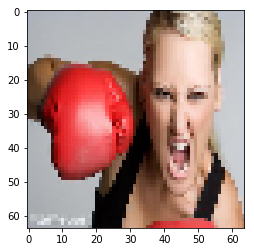

In [16]:
img_path="images/my_image3.jpg"
img=image.load_img(img_path,target_size=(64,64))
imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

print(happyModel.predict(x))

In [17]:
'''
其他一些有用的keras函数
model.summary()
plot_model()

'''

'\n其他一些有用的keras函数\nmodel.summary()\nplot_model()\n\n'

In [18]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
__________

In [19]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

'''
注意：此处会出现import graphviz和pydot出错等问题，可参考一下方法解决

针对该问题的解决方法：
https://blog.csdn.net/hahajinbu/article/details/72859849

关键是按上述方法下载graphviz二进制文件安装后，必须重新启动jupyter才能使环境变量生效
'''

'\n注意：此处会出现import graphviz和pydot出错等问题，可参考一下方法解决\n\n针对该问题的解决方法：\nhttps://blog.csdn.net/hahajinbu/article/details/72859849\n\n关键是按上述方法下载graphviz二进制文件安装后，必须重新启动jupyter才能使环境变量生效\n'

In [20]:
'''
Part2:残差神经网络

学习如何使用残差神经网络(ResNets)构建深度卷积神经网络。
理论上，神经网络层次越深，能实现越复杂的功能，但往往难以训练。
而ResNets能让我们训练更深层次的神经网络（N层模块的输入是N-1层模块的输入和N-1层模块的输出之和）

本部分实现：
1、ResNets的基本构架模块
2、将基本模块集成，构建图片分类器

'''

'\nPart2:残差神经网络\n\n学习如何使用残差神经网络(ResNets)构建深度卷积神经网络。\n理论上，神经网络层次越深，能实现越复杂的功能，但往往难以训练。\n而ResNets能让我们训练更深层次的神经网络（N层模块的输入是N-1层模块的输入和N-1层模块的输出之和）\n\n本部分实现：\n1、ResNets的基本构架模块\n2、将基本模块集成，构建图片分类器\n\n'

In [21]:
import os
os.chdir('../ResNets')

In [22]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [23]:
'''
非常深度神经网络的问题所在：
1、从少层神经网络(AlexNet)已经发展到深层神经网络，能表示更为复杂的功能，也能从多个层次进行功能抽象，
从多个级别进行特征学习。但是出现了新的问题——深度神经网络所带来的梯度消失——深度网络梯度迅速下降为0，从而梯度下降算法很慢
2、反向传播实现梯度下降时，每一步都乘以权重矩阵，因而梯度迅速下降为0，极少情况下会增加

'''

'\n非常深度神经网络的问题所在：\n1、从少层神经网络(AlexNet)已经发展到深层神经网络，能表示更为复杂的功能，也能从多个层次进行功能抽象，\n从多个级别进行特征学习。但是出现了新的问题——深度神经网络所带来的梯度消失——深度网络梯度迅速下降为0，从而梯度下降算法很慢\n2、反向传播实现梯度下降时，每一步都乘以权重矩阵，因而梯度迅速下降为0，极少情况下会增加\n\n'

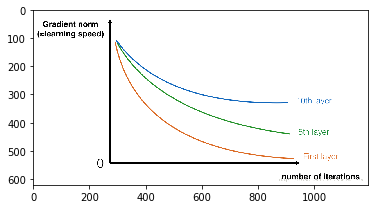

In [24]:
img_path1="1.png"
img1=image.load_img(img_path1,interpolation="nearest")
imshow(img1)

#下图可知：反向传播到第一层时，梯度下降很快，趋近于0——gradient vanish现象

In [25]:
'''
建立残差神经网络

ResNets中，由于采用了shortcut和跳跃连接，反向传播时梯度能直接传递到前一层，减少了梯度损失的机会，
从而更适用于构建深层神经网络

We also saw in lecture that having ResNet blocks with the shortcut also makes it very easy 
for one of the blocks to learn an identity function. This means that you can stack on additional 
ResNet blocks with little risk of harming training set performance. (There is also some evidence
that the ease of learning an identity function–even more than skip connections helping with
vanishing gradients–accounts for ResNets’ remarkable performance.)
'''



'\n建立残差神经网络\n\nResNets中，由于采用了shortcut和跳跃连接，反向传播时梯度能直接传递到前一层，减少了梯度损失的机会，\n从而更适用于构建深层神经网络\n\nWe also saw in lecture that having ResNet blocks with the shortcut also makes it very easy \nfor one of the blocks to learn an identity function. This means that you can stack on additional \nResNet blocks with little risk of harming training set performance. (There is also some evidence\nthat the ease of learning an identity function–even more than skip connections helping with\nvanishing gradients–accounts for ResNets’ remarkable performance.)\n'

In [26]:
'''
2.1恒等模块实现

'''

'\n2.1恒等模块实现\n\n'

In [31]:
# GRADED FUNCTION: convolutional_block

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(F2, (f, f), strides = (1,1), name = conv_name_base + '2b', padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    ### END CODE HERE ###

    return X

def identity_block(X,f,filters,stage,block):
    
    """
    参数：
    输入  X
    f     卷积滤波器的size integer
    filters 卷积滤波器 list
    stage 用于命名神经网络的layers integer
    block 用于命名layers string/character
    
    输出：
    X tensor类型
    
    """
    #定义 name
    conv_name_base="res"+str(stage)+block+"_branch"
    bn_name_base="bn"+str(stage)+block+"_branch"
    
    #滤波器
    F1,F2,F3=filters
    
    #存储输入值，便于后面shortcut相加
    X_shortcut=X
    
    #第一部分
    X=Conv2D(filters=F1,kernel_size=(1,1),strides=(1,1),padding='valid',name=conv_name_base+'2a',kernel_initializer=glorot_uniform(seed=0))(X)
    X=BatchNormalization(axis=3,name=bn_name_base+'2a')(X)
    X=Activation('relu')(X)
    
    #第二部分
    X=Conv2D(filters=F2,kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X=BatchNormalization(axis=3,name=bn_name_base+'2b')(X)
    X=Activation('relu')(X)
    
    #第三部分
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    #最后一步
    X=Add()([X,X_shortcut])
    X=Activation('relu')(X)
    
    return X

In [28]:
#测试
tf.reset_default_graph()
with tf.Session() as test:
    np.random.seed(1)
    A_prev=tf.placeholder("float",[3,4,4,6])
    X=np.random.randn(3,4,4,6)
    A=identity_block(A_prev,f=2,filters=[2,4,6],stage=1,block='a')
    test.run(tf.global_variables_initializer())
    out=test.run([A],feed_dict={A_prev:X,K.learning_phase():0})
    print("out="+str(out[0][1][1][0]))

out=[0.27030745 0.         1.7505068  2.1199005  0.         1.2631985 ]


In [44]:
#3、建立第一个残差神经网络
def ResNet50(input_shape = (64, 64, 3), classes = 6):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)


    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2, 2), name='avg_pool')(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [49]:
import keras
keras.backend.clear_session() 
#以上内容必不可少，少了会报错。ValueError: Tensor Tensor(“Placeholder:0”, shape=(3, 3, 1, 32), dtype=float32) is no an element of this graph
#因为之前训练的model会影响当前训练的model

model = ResNet50(input_shape = (64, 64, 3), classes = 6)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
from resnets_utils import *
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [51]:
model.fit(X_train,Y_train,epochs=2,batch_size=32)

Epoch 1/2
1080/1080 [==============================] - 155s 143ms/step - loss: 2.1803 - acc: 0.4093
Epoch 2/2
1080/1080 [==============================] - 142s 132ms/step - loss: 0.8695 - acc: 0.6583


In [55]:
preds=model.evaluate(X_test,Y_test)
print("Loss="+str(preds[0]))
print("Test Accuracy="+str(preds[1]))
print(preds)

120/120 [==============================] - 4s 30ms/step
Loss=13.136192385355631
Test Accuracy=0.16666666716337203
[13.136192385355631, 0.16666666716337203]


In [58]:
#因为.ResNet50.h5文件太大，所以此处略过

In [59]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [60]:
plot_model(model,to_file="model.png")

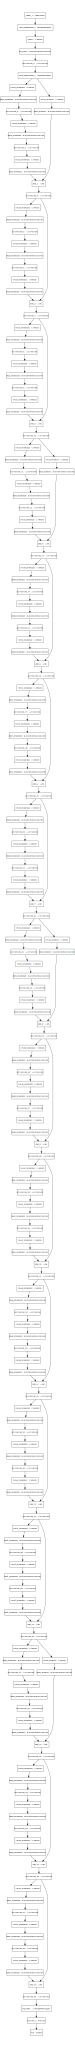

In [61]:
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [63]:
os.getcwd()

'C:\\Users\\CT\\PycharmProjects\\jupyter\\AndrewNg\\Andrew_All\\Course4-CNN\\week2\\ResNets'